In [11]:
import pandas as pd
import ast
from sklearn.model_selection import train_test_split
from sklearn.metrics import hamming_loss
from sklearn.metrics import ConfusionMatrixDisplay, matthews_corrcoef, f1_score
import jsonlines
import json
import logging
from sklearn.preprocessing import MultiLabelBinarizer
import os
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt


## Preprocess

The first step of proeprocessing includes:

* grouping tags per Id
* select top_common_tags
* join questions with list of tags
* include questions that have at least score >= min_question_score. In that sense, we only take questions that most likely there would relevant context to tags
* sample max_num_questions

Next we parse body html creating two type of parsed text:
* Body_with_code: cleaned from elements, including code as text
* Body_no_code: cleaned from elements, excluding code

Next we sanitize title & Body_no_code text, creating Title_clean & Body_clean_no_code:
* Lower case
* Remove special characters, puctuation and stop word
* Lemmatizing words

Finally we merge:
* Title_clean & Body_clean_no_code, creating text_clean to feed baseline model
* Title & Body_with_code, creating text_with_code to feed CodeBert model

Outcome is the following processed dataset


In [7]:
df = pd.read_csv('data/data.csv', encoding='latin-1')

In [8]:
i = 17
lines_sep = 80 * '-'
print(df.iloc[i]['Tag'])
print(lines_sep)
print(df.iloc[i]['Title'])
print(lines_sep)
print(df.iloc[i]['Body'])
print(lines_sep)
print(df.iloc[i]['text_clean'])
print(lines_sep)
print(df.iloc[i]['text_with_code'])

['c#']
--------------------------------------------------------------------------------
The Calling thread cannot access this object because a different thread owns it,WPF
--------------------------------------------------------------------------------
<p>I have a hardware which is connected through socket,</p>

<p>now i have to check that hardware is connected or not at every 5 seconds which is shown by a checkbox</p>

<p>i have implemented a function :</p>

<pre><code>private static System.Timers.Timer aTimer;
public MainWindow()
{
    InitializeComponent();
    client.BeginConnect(remoteEP, new AsyncCallback(ConnectCallback), client);
    aTimer = new System.Timers.Timer();
    aTimer.AutoReset = true;
    aTimer.Elapsed += new ElapsedEventHandler(OnTimedEvent);

    aTimer.Interval = 2000;
    aTimer.Enabled = true;
}

private void OnTimedEvent(object source, ElapsedEventArgs e)
{
    if (client.Connected == true)
    {
        Console.WriteLine("Not Connected");
        CheckBox.I

In [9]:
df["Tag"] = df["Tag"].apply(ast.literal_eval)
df['labels_len'] = df["Tag"].apply(len)
all_labels = []
for i in range(len(df)):
    all_labels += df.iloc[i]['Tag']

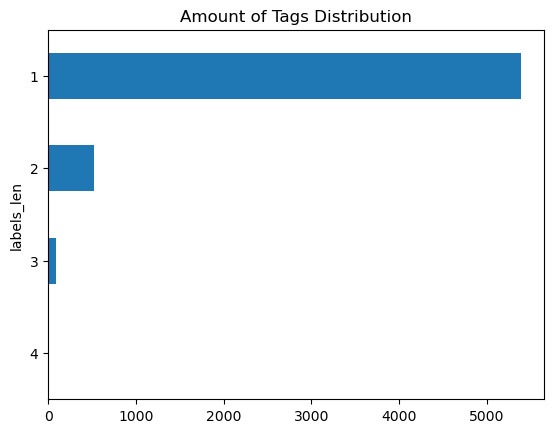

In [14]:
df['labels_len'].value_counts(ascending=True).plot.barh()
plt.title('Amount of Tags Distribution')
plt.show()# HD Plots

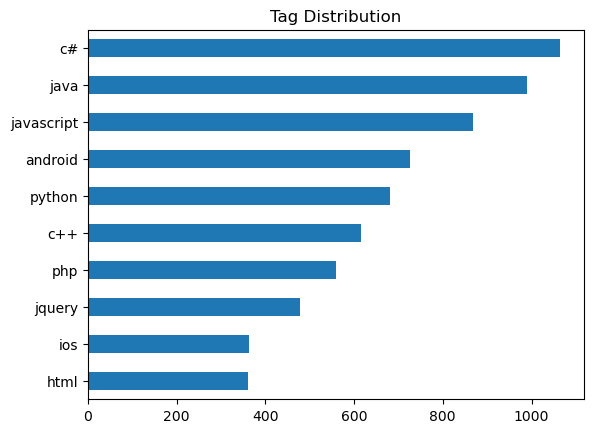

In [12]:
all_labels = []
for i in range(len(df)):
    all_labels += list(df.iloc[i]['Tag'])
pd.Series(all_labels).value_counts(ascending=True).plot.barh()
plt.title('Tag Distribution')
plt.show()# HD Plots

### Enhancements

* impove text sanitization. Test different combinations, stemming etc
* Deal with imbalance problem. Undersample majority classes, or augment minority classes by shuffling sentences etc
* Equilibrium between top_common_tags, max_num_questions and resources to spend